In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
tdoc = pdr.get_data_yahoo('TDOC','2019-05-31')
tdoc.drop('Adj Close', axis=1, inplace=True)
tdoc.drop('High', axis=1, inplace=True)
tdoc.drop('Low', axis=1, inplace=True)
tdoc.drop('Volume', axis=1, inplace=True)

# Get the moving averages
tdoc['3-day'] = tdoc['Close'].rolling(3).mean()
tdoc['9-day'] = tdoc['Close'].rolling(9).mean()
tdoc['21-day'] = tdoc['Close'].rolling(21).mean()
tdoc['Change'] = np.log(tdoc.Close / tdoc.Close.shift())

# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_9v21'] = np.where(tdoc['9-day'] > tdoc['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_9v21'] = np.where(tdoc['9-day'] < tdoc['21-day'],-1,tdoc['position_9v21'])

# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_3v9'] = np.where(tdoc['3-day'] > tdoc['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_3v9'] = np.where(tdoc['3-day'] < tdoc['9-day'],-1,tdoc['position_3v9'])

tdoc['Volatility_21d'] = tdoc.Change.rolling(21).std().shift()
tdoc['Volatility_9d'] = tdoc.Change.rolling(9).std().shift()
tdoc['Volatility_3d'] = tdoc.Change.rolling(3).std().shift()

tdoc.tail()

,Open,Close,3-day,9-day,21-day,Change,position_9v21,position_3v9,Volatility_21d,Volatility_9d,Volatility_3d
Date,,,,,,,,,,,
2021-05-28,150.869995,150.580002,149.300003,143.644446,146.825239,0.010548,-1,1,0.036135,0.017595,0.010903
2021-06-01,153.869995,152.360001,150.646667,145.085558,145.873334,0.011752,-1,1,0.031898,0.015136,0.011262
2021-06-02,151.300003,152.740005,151.893336,146.844447,145.374762,0.002491,1,1,0.031976,0.015060,0.003844
2021-06-03,151.490005,146.589996,150.563334,147.433336,144.813810,-0.041098,1,1,0.030001,0.011444,0.005035
2021-06-04,147.179993,146.570007,148.633336,148.105559,144.317620,-0.000136,1,1,0.030585,0.019120,0.028222


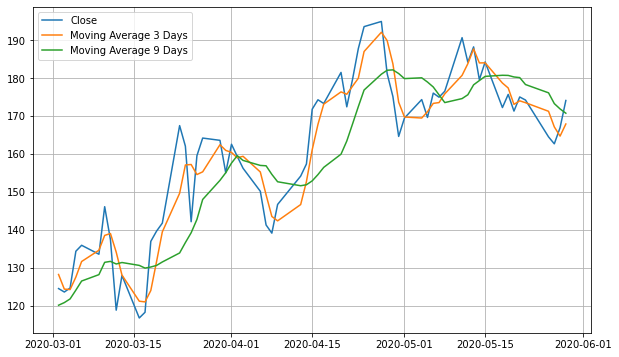

In [2]:
start='20200301'
end= '20200531'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
# plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)
plt.savefig('fourth-3m-close-tdoc.png')

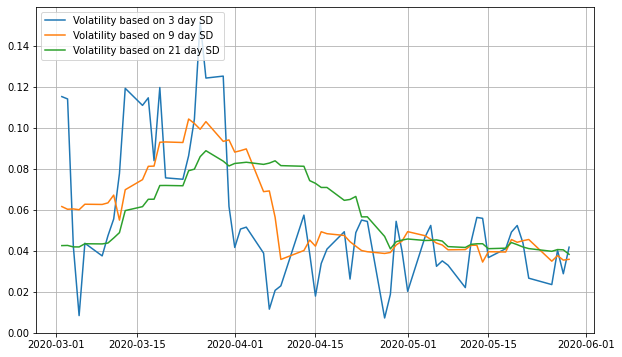

In [3]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Volatility_3d'][start:end],label='Volatility based on 3 day SD')
plt.plot(tdoc['Volatility_9d'][start:end],label='Volatility based on 9 day SD')
plt.plot(tdoc['Volatility_21d'][start:end],label='Volatility based on 21 day SD')
plt.legend(loc=2)
plt.savefig('fourth-3m-volatility-tdoc.png')